<a href="https://colab.research.google.com/github/Charlie021/Optimizacion/blob/main/Metodo_de_Secante.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import sympy

In [ ]:
def GraficarFuncionObjetivo():
    a, b = 40, 90
    
    T = np.linspace(a, b, 100)
    U = (204165.5)/(330 - 2*T) + (10400)/(T - 20)

    plt.figure(figsize=(6, 3))
    plt.plot(T, U, 'b')
    plt.plot(55.08, 1225.17, 'ko')
    plt.annotate(r'$55.08, 1225.17$', (55.08, 1225.17), (50, 1250))

    plt.xlabel("Temperatura")
    plt.ylabel("Costo")
    plt.grid()
    plt.show()
    
    return None

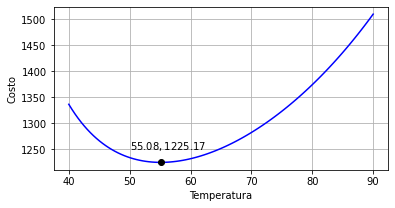

In [ ]:
GraficarFuncionObjetivo()

In [ ]:
def CalcularGradiente():
    T = sympy.Symbol('T')
    fU = (204165.5)/(330-2*T) + (10400)/(T-20)

    d1fU = sympy.diff(fU)

    print(fU)
    print(d1fU)

    return None

In [ ]:
CalcularGradiente()

10400/(T - 20) + 204165.5/(330 - 2*T)
-10400/(T - 20)**2 + 408331.0/(330 - 2*T)**2


In [ ]:
# Funcion objetivo
def U(T):
    return 10400/(T - 20) + 204165.5/(330 - 2*T)

In [ ]:
U(55.08)

1225.1656408350887

In [ ]:
# Primera derivada
def d1U(T):
    return -10400/(T - 20)**2 + 408331.0/(-2*T + 330)**2

In [ ]:
d1U(55.08)

-0.0022423688924249063

In [ ]:
def Secante():
    a, b = 40, 90
    epsilon = 0.01
    
    cont = 0
    registro = []
    
    while True:
        # calcular f'(a)
        dU_a = d1U(a)
        
        # calcular f'(b
        dU_b= d1U(b)
        
        # calcular alpha
        alpha = b - dU_b / ((dU_b - dU_a)/(b - a))
        
        dU_alpha = d1U(alpha)
        
        if dU_alpha > 0:
            b = alpha
        else:
            a = alpha
            
        U_alpha = U(alpha)
        
        cont = cont + 1
        
        registro.append([cont, alpha, U_alpha])
        print("It: {:02d} - Temp: {:.10f} - Costo: {:.10f}".format(cont, alpha, U_alpha))
        
        if np.abs(dU_alpha) <= epsilon:
            print("------------------------------------------------------------------------")
            print("It: {:02d} - Temp: {:.10f} - Costo: {:.10f}".format(cont, alpha, U_alpha))
            break
            
    return registro

In [ ]:
reg = Secante()

It: 01 - Temp: 67.4238416410 - Costo: 1265.4843547060
It: 02 - Temp: 60.8827888776 - Costo: 1234.8456727508
It: 03 - Temp: 57.9389356280 - Costo: 1227.6249518474
It: 04 - Temp: 56.5132183316 - Costo: 1225.7978324621
It: 05 - Temp: 55.8045366165 - Costo: 1225.3285410968
It: 06 - Temp: 55.4483617340 - Costo: 1225.2076290459
It: 07 - Temp: 55.2684366108 - Costo: 1225.1764608953
It: 08 - Temp: 55.1773211286 - Costo: 1225.1684267004
It: 09 - Temp: 55.1311231215 - Costo: 1225.1663559004
It: 10 - Temp: 55.1076851354 - Costo: 1225.1658221870
It: 11 - Temp: 55.0957904902 - Costo: 1225.1656846363
------------------------------------------------------------------------
It: 11 - Temp: 55.0957904902 - Costo: 1225.1656846363


In [ ]:
def Evaluacion(reg):
    reg1 = np.array(reg)
    fig, axs = plt.subplots(1,2, figsize=(15, 4))

    fig.suptitle('Convergencia')

    axs[0].axhline(55.08, color='k' , linewidth=3, linestyle='--')
    axs[0].plot(reg1[:, 0], reg1[:,1], linewidth=4)
    axs[0].set_xlabel('Iteraciones')
    axs[0].set_ylabel('Temperatura')
    axs[0].grid()
    axs[0].set_xlim([0, 15])

    axs[1].axhline(1225.17, color='k' , linewidth=3, linestyle='--')
    axs[1].plot(reg1[:, 0], reg1[:,2], linewidth=4)
    axs[1].set_xlabel('Iteraciones')
    axs[1].set_ylabel('Costo')
    axs[1].grid()
    axs[1].set_xlim([0, 15])

    plt.show()
    
    return None

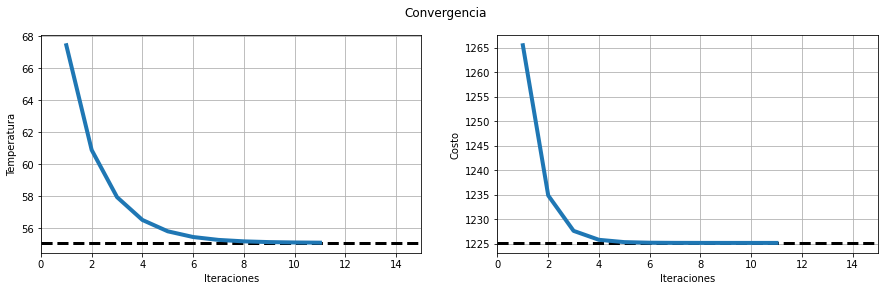

In [ ]:
Evaluacion(reg)